로지스틱 회귀는 분류 문제를 해결하는 데 널리 사용되는 모델입니다.

로지스틱 함수 (시그모이드 함수)를 사용하여 이진 분류 문제를 해결하며, 클래스 확률을 예측합니다. 
    
주로 이진 분류 (0 또는 1) 문제에서 사용되지만, 멀티클래스 문제에도 확장할 수 있습니다.


# 1. 예제: 타이타닉 생존자 예측 (Titanic Survival Prediction)

In [ ]:
# 코드 설명
# 데이터 로드 및 탐색:

# 타이타닉 데이터셋을 로드하고, 기본적인 정보를 출력합니다.
# 데이터 전처리:

# 불필요한 열 (PassengerId, Name, Ticket, Cabin)을 제거합니다.
# Age와 Embarked의 결측값을 채웁니다.
# 범주형 변수 (Sex, Embarked)를 숫자로 인코딩합니다.
# 특성 스케일링:

# Age와 Fare는 연속형 변수이므로 표준화(스케일링)합니다.
# 모델 학습 및 평가:

# 로지스틱 회귀 모델을 학습하고, 테스트 세트에서 예측을 수행합니다.
# 정확도, 혼동 행렬, 분류 보고서를 출력합니다.
# 회귀 계수 분석:

# 로지스틱 회귀 모델의 회귀 계수를 출력하여, 각 특성이 모델 예측에 얼마나 영향을 미치는지 분석합니다.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\JYB\AppData\Local\Temp\ipykernel_6196\1614032024.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\JYB\AppData\Local\Temp\ipykernel_6196\1614032024.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

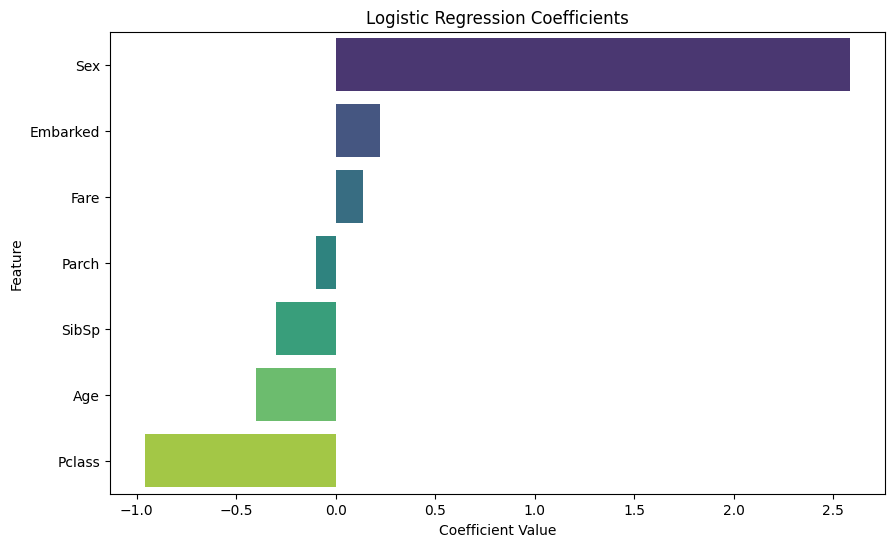

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df["Survived"].value_counts())

# 3. 데이터 전처리
# 불필요한 열 제거
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# 결측치 처리
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# 범주형 변수 인코딩
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# 4. 특성 스케일링
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

# 5. 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Survived"])
y = df["Survived"]

# 6. 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

# 8. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 9. 특성 중요도 (회귀 계수) 분석
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n로지스틱 회귀 계수:\n", coefficients)

# 10. 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


결론

로지스틱 회귀 모델은 간단하고 해석이 용이하며, 특성 간의 관계를 분석하는 데 유용합니다.

타이타닉 데이터셋에서는 성별, 객실 등급, 나이와 같은 특성이 생존 여부를 예측하는 데 중요한 역할을 합니다.

# 2. 신용카드 사기 탐지 데이터셋

In [ ]:
# 코드 설명
# 데이터 로드 및 탐색:
# Kaggle에서 제공하는 신용카드 사기 탐지 데이터셋을 로드하고, 기본적인 정보를 출력합니다.

# 데이터 전처리:
# Amount와 Time 컬럼은 연속형 변수이므로, StandardScaler를 사용해 표준화합니다.

# 데이터 불균형 문제 해결:
# SMOTE를 사용하여 소수 클래스(사기 거래)를 오버샘플링하여 클래스 비율을 맞춥니다.

# 로지스틱 회귀 모델 학습 및 평가:
# LogisticRegression 클래스를 사용해 모델을 학습합니다.
# 테스트 데이터에서 예측을 수행하고, 정확도, 혼동 행렬, 분류 보고서를 출력합니다.

# 회귀 계수 분석:
# 로지스틱 회귀 모델의 회귀 계수를 출력하고, 각 특성이 모델 예측에 얼마나 영향을 미치는지 분석합니다.


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

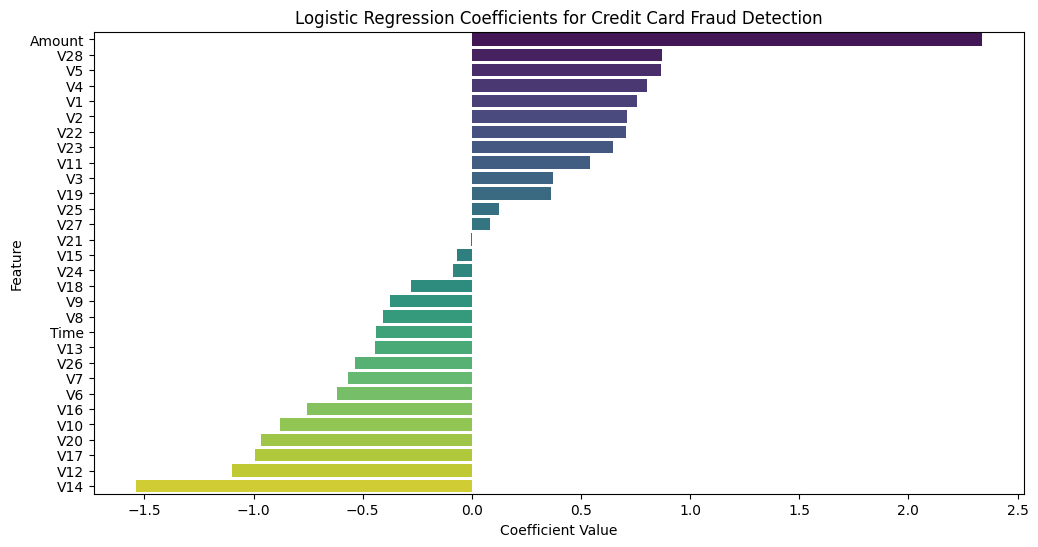

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. 데이터 로드
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df["Class"].value_counts())

# 3. 데이터 전처리
# 특성 스케일링 (Amount와 Time 컬럼)
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
df["Time"] = scaler.fit_transform(df[["Time"]])

# 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Class"])
y = df["Class"]

# 4. 데이터 불균형 문제 해결 (SMOTE 적용)
print("\n오버샘플링 전 클래스 비율:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n오버샘플링 후 클래스 비율:")
print(pd.Series(y_resampled).value_counts())

# 5. 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 6. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

# 7. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 8. 회귀 계수 분석
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n로지스틱 회귀 계수:\n", coefficients)

# 9. 회귀 계수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Logistic Regression Coefficients for Credit Card Fraud Detection')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


결론

로지스틱 회귀 모델은 간단하지만 해석이 용이하며, 금융 데이터 분석에서 중요한 역할을 할 수 있습니다.
    
데이터의 불균형 문제를 해결하기 위해 SMOTE와 같은 오버샘플링 기법을 사용하면 성능이 향상될 수 있습니다.
    
더 높은 성능을 위해 L1/L2 정규화, 하이퍼파라미터 튜닝, 더 복잡한 모델 (예: 랜덤 포레스트, XGBoost)을 사용할 수 있습니다.

In [ ]:
# 데이터 셋 다운로그 하여 경로 설정 : 데이터 로드

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

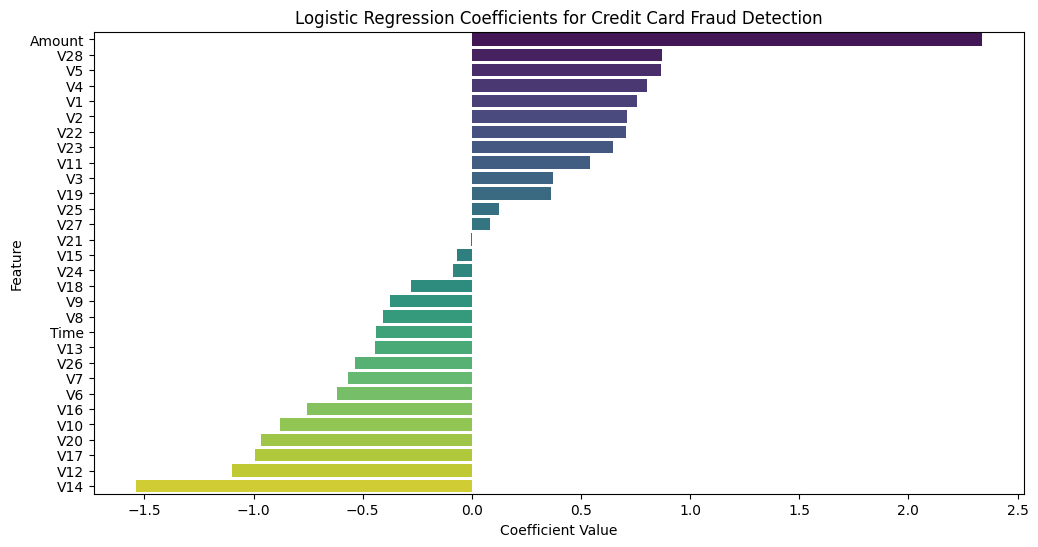

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. 데이터 로드
df = pd.read_csv('creditcard.csv')

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df["Class"].value_counts())

# 3. 데이터 전처리
# 특성 스케일링 (Amount와 Time 컬럼)
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
df["Time"] = scaler.fit_transform(df[["Time"]])

# 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Class"])
y = df["Class"]

# 4. 데이터 불균형 문제 해결 (SMOTE 적용)
print("\n오버샘플링 전 클래스 비율:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n오버샘플링 후 클래스 비율:")
print(pd.Series(y_resampled).value_counts())

# 5. 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 6. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

# 7. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 8. 회귀 계수 분석
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n로지스틱 회귀 계수:\n", coefficients)

# 9. 회귀 계수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Logistic Regression Coefficients for Credit Card Fraud Detection')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
